# Matplotlib

In [8]:
%discover

test-esp32  serial:///dev/ttyUSB0  
Registration failed for ws://10.39.40.135:8266: [Errno 104] Connection reset by peer


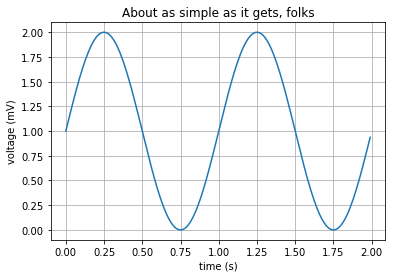

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
plt.show()

# Animations

In [1]:
%matplotlib notebook

from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook

from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

## Numpy Ringbuffer

* https://pypi.org/project/dvg-ringbuffer/
* Based on (API): https://github.com/eric-wieser/numpy_ringbuffer

In [3]:
!pip install dvg-ringbuffer

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [16]:
from dvg_ringbuffer import RingBuffer
capacity = 5

rb = RingBuffer(capacity, dtype=(np.float64, 3), allow_overwrite=True)
for i in range(capacity):
    rb.append([i, i**2, i**3])
    
print(rb)

for i in range(3):
    x = i+10
    rb.append([i, i**2, i**3])
    
print(rb)
print(rb[:,1])

<RingBuffer of array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])>
<RingBuffer of array([[ 3.,  9., 27.],
       [ 4., 16., 64.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.]])>
[ 9. 16.  0.  1.  4.]
